In [31]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns

In [32]:
account = pd.read_csv('Dataset do Case de Analista_Cientista de Dados/Dataset do Case de Analista_Cientista de Dados/account.csv')
event_type = pd.read_csv('Dataset do Case de Analista_Cientista de Dados/Dataset do Case de Analista_Cientista de Dados/event_type.csv')
event = pd.read_csv('Dataset do Case de Analista_Cientista de Dados/Dataset do Case de Analista_Cientista de Dados/event.csv')
subscription = pd.read_csv('Dataset do Case de Analista_Cientista de Dados/Dataset do Case de Analista_Cientista de Dados/subscription.csv')

# 2. Data Manipulation

In [33]:
current_date = dt.datetime(2020, 5, 31)

In [34]:
subscription['start_date'] = pd.to_datetime(subscription['start_date'].astype(str), format='%Y-%m-%d')
subscription['end_date'] = pd.to_datetime(subscription['end_date'].astype(str), format='%Y-%m-%d')
event['event_time'] = pd.to_datetime(event['event_time'])

# 2. Exploratory Analysis

#### How many years and months of data do we have?

In [35]:
year=len(subscription['end_date'].dt.year.value_counts().index)
month=len(subscription['end_date'].dt.month.value_counts().index)

In [36]:
print(str(year)+" year(s) and "+str(month)+" month(s)")

1 year(s) and 5 month(s)


#### What is the date range?

In [37]:
start_date = subscription['start_date'].min()
end_date = subscription['end_date'].max()

In [38]:
print("Starts "+str(start_date)+" and Ends "+str(end_date))

Starts 2020-01-01 00:00:00 and Ends 2020-06-30 00:00:00


#### What is the MRR of the data?

In [39]:
#get monthly range date
date_range_start = pd.date_range(start_date,end_date, freq='MS')
date_range_end = pd.date_range(start_date,end_date, freq='M')

In [40]:
#populate monthly data
df = pd.DataFrame()
df['date_start']=date_range_start
df['date_end']=date_range_end

arr_mrr = []
for index,row in df.iterrows():
    mrr = subscription['mrr'].loc[(subscription['start_date'] >= row['date_start']) & (subscription['start_date'] <= row['date_end']) ].sum() #mrr on period
    arr_mrr.append(mrr)

df['MRR'] = arr_mrr
df['Year Month'] = df['date_start'].dt.strftime('%Y-%m')

Text(0.2, 0.9, '23.85% increase in MRR \nin the period')

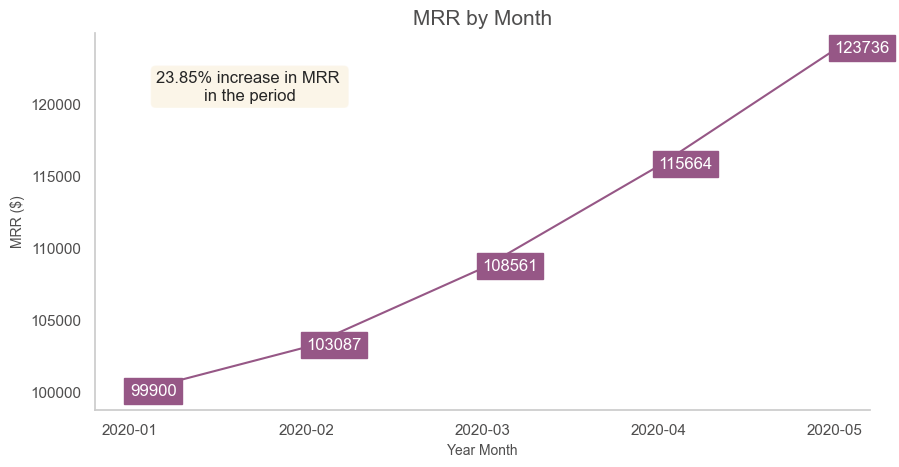

In [41]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set(style="whitegrid")
sns.lineplot(data=df.drop(index = 5), x="Year Month", y="MRR", marker="o", markers=True, dashes=False, color='#965786')

for x, y in zip(df['Year Month'].drop(index = 5), df['MRR'].drop(index = 5)): # Put data points
    plt.text(x = x, y = y-150, s = '{:.0f}'.format(y))
    plt.text(x, y-150, '{:.0f}'.format(y), color='white').set_backgroundcolor('#965786')

plt.title('MRR by Month', size=15, color='#4f4e4e')
plt.xlabel('Year Month', size=10, color='#4f4e4e')
plt.ylabel('MRR ($)', size=10, color='#4f4e4e')

ax = plt.subplot() #remove grid and spines
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['right'].set_color('#4f4e4e')
ax.spines['top'].set_color('#4f4e4e')
ax.tick_params(colors='#4f4e4e')

text="23.85% increase in MRR \nin the period"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.2, 0.9, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', bbox=props) #text legend

#### What is the MRR Churn of the data?

In [42]:
#get user subscription cycle 
user_mrr = subscription.groupby(by='account_id', as_index=False).agg({'start_date':'min', 'end_date':'max', 'mrr':'sum', 'id': 'count'})

In [43]:
month_mrr = user_mrr['mrr']/user_mrr['id']
user_mrr['month_mrr'] = month_mrr.astype(float)

arr_mrr = []
for index,row in df.iterrows():
    mrr = user_mrr['month_mrr'].loc[user_mrr['end_date'] <= row['date_end']].sum() #accomulated MRR churn
    arr_mrr.append(mrr)

df['MRR Churn'] = arr_mrr

Text(0.17, 0.92, '69.80% increase in Churn\n between February and May.')

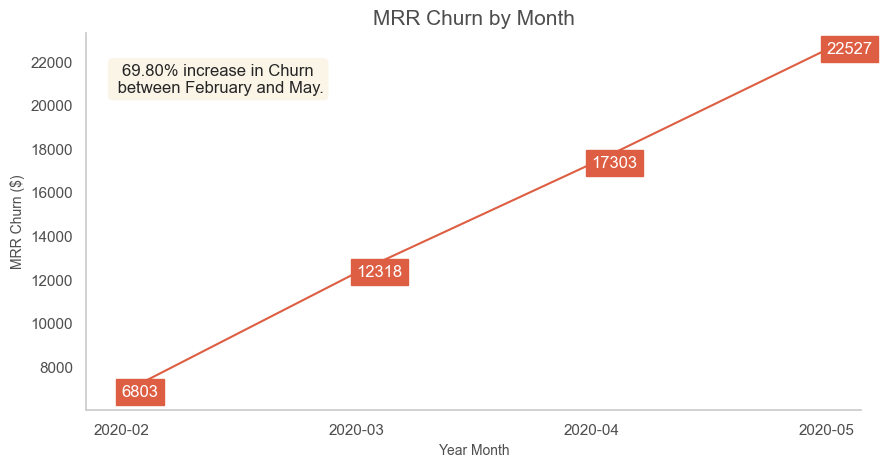

In [44]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set(style="whitegrid")
sns.lineplot(data=df.drop(index = [0,5]), x="Year Month", y="MRR Churn", marker="o", markers=True, dashes=False, color='#DD5E42')

for x, y in zip(df['Year Month'].drop(index = [0,5]), df['MRR Churn'].drop(index = [0,5])): # Put data points
    plt.text(x = x, y = y-150, s = '{:.0f}'.format(y))
    plt.text(x, y-150, '{:.0f}'.format(y), color='white').set_backgroundcolor('#DD5E42')

plt.title('MRR Churn by Month', size=15, color='#4f4e4e')
plt.xlabel('Year Month', size=10, color='#4f4e4e')
plt.ylabel('MRR Churn ($)', size=10, color='#4f4e4e')
ax = plt.subplot() #remove grid and spines
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['right'].set_color('#4f4e4e')
ax.spines['top'].set_color('#4f4e4e')
ax.tick_params(colors='#4f4e4e')

text="69.80% increase in Churn\n between February and May."
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.17, 0.92, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', bbox=props) #text legend

#### How many new users and Churn users per month?

In [15]:
arr_mrr = []
arr_nu = []
for index,row in df.iterrows():
    nu = user_mrr['account_id'].loc[(user_mrr['start_date'] >= row['date_start']) & (user_mrr['start_date'] <= row['date_end'])].count() #new users
    mrr = user_mrr['account_id'].loc[(user_mrr['end_date'] >= row['date_start']) & (user_mrr['end_date'] <= row['date_end'])].count() #churn users

    arr_nu.append(nu)
    arr_mrr.append(mrr)

    

df['New Users'] = arr_nu
df['Churn Users'] = arr_mrr

Text(0.2, 0.91, 'There was a 33% increase in the \nnumber of users \nbetween February and May.')

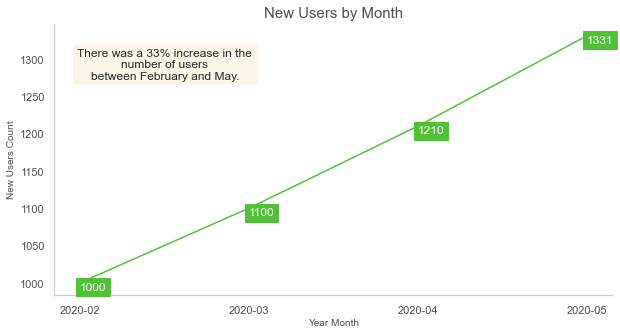

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set(style="whitegrid")

new_users = df.drop(index=[0,5])
sns.lineplot(data=new_users, x="Year Month", y='New Users', marker="o", markers=True, dashes=False, color='#51C138')
for x, y in zip(new_users['Year Month'], new_users['New Users']): # Put data points
    plt.text(x = x, y = y-10, s = '{:.0f}'.format(y))
    plt.text(x, y-10, '{:.0f}'.format(y), color='white').set_backgroundcolor('#51C138')


plt.title('New Users by Month', size=15, color='#4f4e4e')
plt.xlabel('Year Month', size=10, color='#4f4e4e')
plt.ylabel('New Users Count', size=10, color='#4f4e4e')
ax = plt.subplot() #remove grid and spines
ax.grid(False)
ax.spines['right'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['right'].set_color('#4f4e4e')
ax.spines['top'].set_color('#4f4e4e')
ax.tick_params(colors='#4f4e4e')

text="There was a 33% increase in the \nnumber of users \nbetween February and May."
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.2, 0.91, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', bbox=props) #text legend

Text(0.8, 0.91, 'The number of Churn users had a \nrelevant drop of 23% in March, \nbut remains recurring \nin the coming months.')

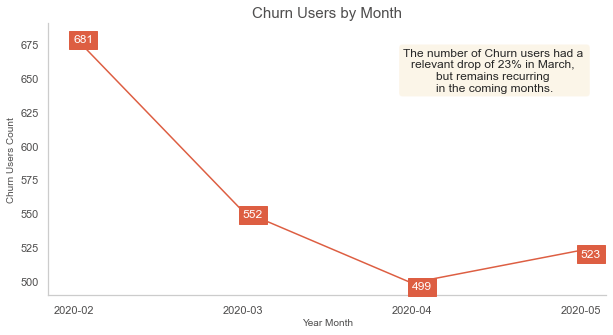

In [17]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set(style="whitegrid")
sns.lineplot(data=df.drop(index=[0,5]), x="Year Month", y='Churn Users', marker="o", markers=True, dashes=False, color='#DD5E42')
for x, y in zip(df['Year Month'].drop(index=[0,5]), df['Churn Users'].drop(index=[0,5])): # Put data points
    plt.text(x = x, y = y-5, s = '{:.0f}'.format(y))
    plt.text(x, y-5, '{:.0f}'.format(y), color='white').set_backgroundcolor('#DD5E42')

plt.title('Churn Users by Month', size=15, color='#4f4e4e')
plt.xlabel('Year Month', size=10, color='#4f4e4e')
plt.ylabel('Churn Users Count', size=10, color='#4f4e4e')
ax = plt.subplot() #remove grid and spines
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['right'].set_color('#4f4e4e')
ax.spines['top'].set_color('#4f4e4e')
ax.tick_params(colors='#4f4e4e')


text="The number of Churn users had a \nrelevant drop of 23% in March, \nbut remains recurring \nin the coming months."
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.8, 0.91, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', bbox=props) #text legends

#### For every 2 users who enter the platform, 1 user churns on the other hand. Do we have any users that have returned to use the platform? (Resurrect Users)

In [18]:
date_diff = round(((user_mrr['end_date']-user_mrr['start_date'])/np.timedelta64(1, 'M')))  #count client all time range in months
user_mrr['date_diff'] = date_diff.astype(int)

In [19]:
#compare ID (count of subscription cycle) with date_diff (client all time range in months)
print("There were "+str(user_mrr['account_id'].loc[user_mrr['id'] != user_mrr['date_diff']].count())+" users who re-subscribed during this period (Resurrect Users)")

There were 0 users who re-subscribed during this period (Resurrect Users)


#### How many subscription months did May churn users have?

In [20]:
users_churn_may = user_mrr.loc[(user_mrr['end_date'] >= '2020-05-01') & (user_mrr['end_date'] <= '2020-05-31')] #all churn users in May
date_diff = round(((users_churn_may['end_date']-users_churn_may['start_date'])/np.timedelta64(1, 'M'))) #get user cycle date range
df_months = date_diff.value_counts(normalize=True).reset_index()
df_months['index'] = df_months['index'].astype(int)

Text(0.17, 0.8, '64.3% of churn users in May were \n4 months away from subscribing.')

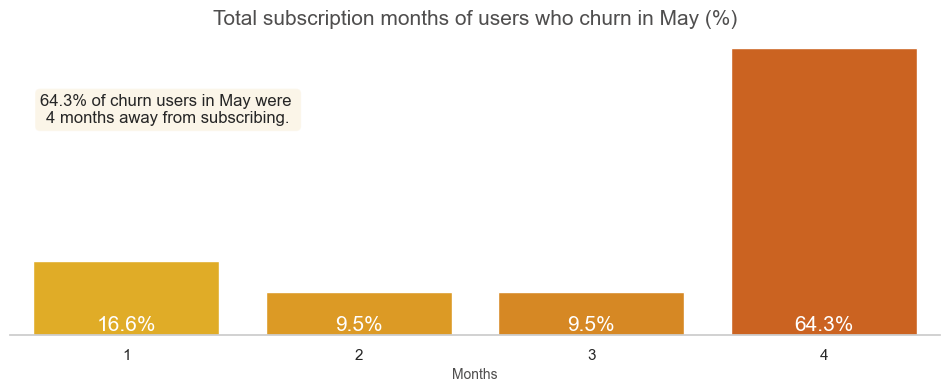

In [21]:
plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=df_months, x="index", y=0, palette=['#ffba08','#faa307','#f48c06','#e85d04', "#dc2f02"])

plt.xlabel('Months', size=10, color='#4f4e4e')
plt.ylabel('')
plt.title('Total subscription months of users who churn in May (%)', size=15, color='#4f4e4e')
plt.yticks([], [])
plt.text(x=0, y=0.01, s="16.6%", 
                 color='white', fontsize=15, horizontalalignment='center')
plt.text(x=1, y=0.01, s="9.5%", 
                 color='white', fontsize=15, horizontalalignment='center')
plt.text(x=2, y=0.01, s="9.5%", 
                 color='white', fontsize=15, horizontalalignment='center')
plt.text(x=3, y=0.01, s="64.3%", 
                 color='white', fontsize=15, horizontalalignment='center')

sns.despine(left=True)


text="64.3% of churn users in May were \n4 months away from subscribing."
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.17, 0.80, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', bbox=props) #text legend

### Older users are the most churn currently. Were these users active on the platform?

In [22]:
#Get relation between events and users for all data
event_churn_users = event
event_churn_users['Year Month'] = event_churn_users['event_time'].dt.strftime('%Y %m')
event_churn_users = event_churn_users.groupby(by='Year Month', as_index=False).agg({'event_time':'count', 'account_id':'nunique'})
event_churn_users['Events/Users'] = event_churn_users['event_time']/event_churn_users['account_id']

In [23]:
#Get relation between events and users for May churn users
churn_users_may = user_mrr['account_id'].loc[(user_mrr['end_date'] >= '2020-05-01') & (user_mrr['end_date'] <= '2020-05-31')].unique()
event_churn_users_may = event[event['account_id'].isin(churn_users_may)]
event_churn_users_may_tot = event_churn_users_may
event_churn_users_may['Year Month'] = event_churn_users_may['event_time'].dt.strftime('%Y %m')
event_churn_users_may = event_churn_users_may.groupby(by='Year Month', as_index=False).agg({'event_time':'count', 'account_id':'nunique'})
event_churn_users_may['Events/Users'] = event_churn_users_may['event_time']/event_churn_users_may['account_id']

C:\Users\erycm\AppData\Local\Temp/ipykernel_22756/2364488945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_churn_users_may['Year Month'] = event_churn_users_may['event_time'].dt.strftime('%Y %m')


Text(1, 0.57, 'Users who churned in \nMay interacted 42.1% \nless than average \nbetween January and April.')

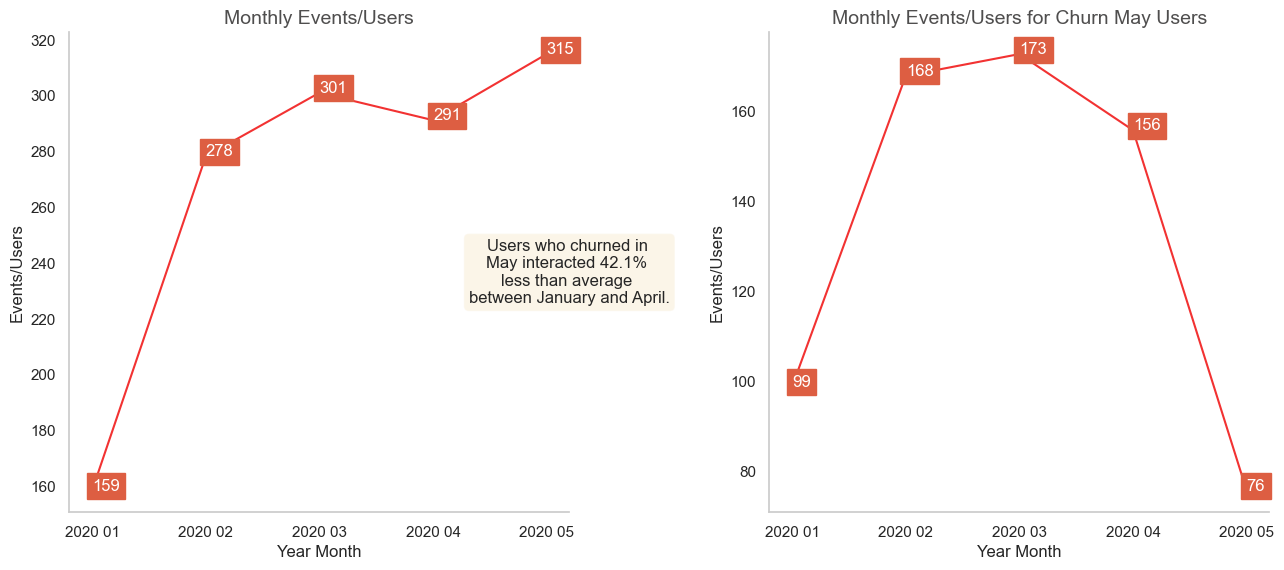

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.set(style="whitegrid")

sns.lineplot(data=event_churn_users, x='Year Month', y='Events/Users', marker="o", markers=True, dashes=False, color='#F23232', ax=ax[0])
ax[0].set_title("Monthly Events/Users", fontsize=14, color='#4f4e4e')
ax[0].grid(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

for x, y in zip(event_churn_users['Year Month'], event_churn_users['Events/Users']): # Put data points
    ax[0].text(x = x, y = y, s = '{:.0f}'.format(y))
    ax[0].text(x, y, '{:.0f}'.format(y), color='white').set_backgroundcolor('#DD5E42')

sns.lineplot(data=event_churn_users_may, x='Year Month', y='Events/Users', marker="o", markers=True, dashes=False, color='#F23232', ax=ax[1])
ax[1].set_title("Monthly Events/Users for Churn May Users", fontsize=14, color='#4f4e4e')
ax[1].grid(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

for x, y in zip(event_churn_users_may['Year Month'], event_churn_users_may['Events/Users']): # Put data points
    ax[1].text(x = x, y = y, s = '{:.0f}'.format(y))
    ax[1].text(x, y, '{:.0f}'.format(y), color='white').set_backgroundcolor('#DD5E42')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) #spacing between subplots


text="Users who churned in \nMay interacted 42.1% \nless than average \nbetween January and April."
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax[0].text(1, 0.57, text, transform=ax[0].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', bbox=props) #text legend

### Were your interactions different from the average user?

In [25]:
#Get relation between events and Users from jan to apr

event_churn_users_label = pd.merge(event, event_type, on='event_type_id', how='left')
event_churn_users_label = event_churn_users_label.loc[(event_churn_users_label['event_time'] >= '2020-01-01') & (event_churn_users_label['event_time'] <= '2020-04-30')]
event_churn_users_label = event_churn_users_label.groupby(by=['event_type_name'], as_index=False).agg({'event_time':'count','account_id':'nunique'})
event_churn_users_label['Events/Users'] = event_churn_users_label['event_time']/event_churn_users_label['account_id']
event_churn_users_label['% of Events/Users'] = round((event_churn_users_label['Events/Users']/event_churn_users_label['Events/Users'].sum())*100,1)
event_churn_users_label['label'] = "Jan to Apr Total Users"

In [26]:
#Get relation between events and Users from jan to apr for May churn users
event_churn_users_may_tot = pd.merge(event_churn_users_may_tot, event_type, on='event_type_id', how='left')
event_churn_users_may_tot = event_churn_users_may_tot.loc[(event_churn_users_may_tot['event_time'] >= '2020-01-01') & (event_churn_users_may_tot['event_time'] <= '2020-04-30')]
event_churn_users_may_tot = event_churn_users_may_tot.groupby(by=['event_type_name'], as_index=False).agg({'event_time':'count','account_id':'nunique'})
event_churn_users_may_tot['Events/Users'] = event_churn_users_may_tot['event_time']/event_churn_users_may_tot['account_id']
event_churn_users_may_tot['% of Events/Users'] = round((event_churn_users_may_tot['Events/Users']/event_churn_users_may_tot['Events/Users'].sum())*100,1)
event_churn_users_may_tot['label'] = "Jan to Apr May Churn Users"

In [27]:
#union all events
df = pd.concat([event_churn_users_label,event_churn_users_may_tot])

Text(0.45, 0.8, 'Users who churned in May \ntypically consume 5.5% less \nmessaging than average. \nHowever, this difference \nmay not be very relevant.')

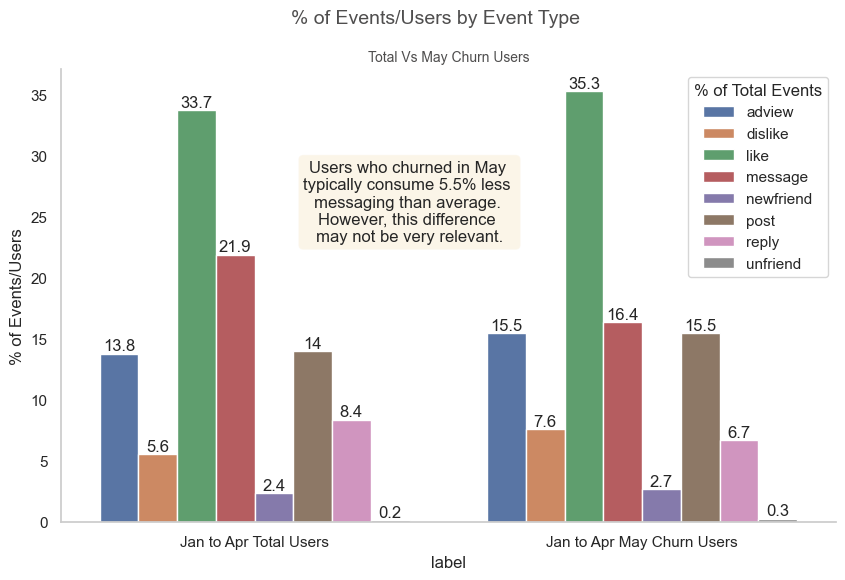

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='label', y='% of Events/Users', hue='event_type_name')
for container in ax.containers:
    ax.bar_label(container)

ax.set_title("Total Vs May Churn Users", fontsize=10, color='#4f4e4e')
fig.suptitle("% of Events/Users by Event Type", fontsize=14, color='#4f4e4e')
ax.legend(title='% of Total Events')

sns.set(style="whitegrid")
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

text="Users who churned in May \ntypically consume 5.5% less \nmessaging than average. \nHowever, this difference \nmay not be very relevant."
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.45, 0.8, text, transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', bbox=props) #text legend

# 3. Conclusion

Even though it has been steadily growing over the last few months there is a constant churn issue on the platform. Analyzing the relationship between MRR and Churn MRR we can see the **growth potential of approximately 18.2%** with the return of old users back to the platform. Currently **for every 2 new users, 1 retained user churns**. During this entire period, there were no users who re-registered on the platform (ressurect users).

To resolve this issue the following actions are suggested:

1. Greater attention to Churn users of the platform:
    * Approach them with emails about promotions, news and other incentives to use the service again.
    * Direct contact with some churn customers (Phone, Email, SMS, etc..) and question them about giving up the service, *generating insights into possible improvements*.

2. Greater attention to Retained users on the platform. According to the analyses, **users who dropped out in May interacted 42.1% below the average of other service users**:
    * Encouraging users who have a below average interaction ratio by giving targeted suggestions based on their interests on the platform.
    * *Create satisfaction surveys (NPS)* and a place to make complaints and suggestions. Shortening the contact channel with users and customer service.